In [70]:
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd

# ## Travel.state.gov intercountry data:
data = requests.get("https://services6.arcgis.com/R6wlO6UHmSzqm9Vs/arcgis/rest/services/Country_Adoptions_by_Year/FeatureServer/0/query?f=json&where=1=1&returnGeometry=false&spatialRel=esriSpatialRelIntersects&outFields=*&orderByFields=Country%20asc&resultOffset=0&resultRecordCount=2599&resultType=standard&cacheHint=true")

data = data.json() ## converts into json formatting

country_data_from_json = data["features"]

column_names = country_data_from_json[0]["attributes"].keys()
names = format_column_names(column_names)
# column_names

country_data = []
for each in country_data_from_json:
    country_data.append(each["attributes"])

df = pd.DataFrame(columns = column_names)

for data in country_data:
    df = df.append(data, ignore_index=True)
df

,Country,Year_2019,Year_2018,Year_2017,Year_2016,Year_2015,Year_2014,Year_2013,Year_2012,Year_2011,...,Year_2007,Year_2006,Year_2005,Year_2004,Year_2003,Year_2002,Year_2001,Year_2000,Year_1999,FID
0,Afghanistan,2,3,0,0,2,3,2,2,0,...,0,3,0,2,1,1,5,6,1,1
1,Albania,3,5,5,9,6,6,6,1,4,...,12,13,9,9,7,22,16,22,6,2
2,Algeria,2,0,4,1,1,0,2,2,2,...,2,2,0,3,1,1,1,1,0,3
3,Antigua and Barbuda,0,0,0,1,1,0,0,5,2,...,1,1,0,0,0,0,0,0,1,4
4,Argentina,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Vietnam,32,28,30,13,0,0,0,0,0,...,828,163,7,21,382,766,736,728,709,170
172,Yemen,1,0,6,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,171
173,Yugoslavia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,175
174,Zambia,0,0,2,4,9,8,5,11,16,...,27,15,4,11,4,2,1,1,0,172


In [110]:
row = df.iloc[0] ## gets specific rows data --- How would I go about plotting this?
row_data = row.values[1:-1]
row_idx = row.index[1:-1]
print(row_data)
print(row_idx)
print(type(row))

[2 3 0 0 2 3 2 2 0 0 5 3 0 3 0 2 1 1 5 6 1]
Index(['Year_2019', 'Year_2018', 'Year_2017', 'Year_2016', 'Year_2015',
       'Year_2014', 'Year_2013', 'Year_2012', 'Year_2011', 'Year_2010',
       'Year_2009', 'Year_2008', 'Year_2007', 'Year_2006', 'Year_2005',
       'Year_2004', 'Year_2003', 'Year_2002', 'Year_2001', 'Year_2000',
       'Year_1999'],
      dtype='object')
<class 'pandas.core.series.Series'>


In [112]:
row_d = df.loc[df['Country']== 'Afghanistan']
row_d

,Country,Year_2019,Year_2018,Year_2017,Year_2016,Year_2015,Year_2014,Year_2013,Year_2012,Year_2011,...,Year_2007,Year_2006,Year_2005,Year_2004,Year_2003,Year_2002,Year_2001,Year_2000,Year_1999,FID
0,Afghanistan,2,3,0,0,2,3,2,2,0,...,0,3,0,2,1,1,5,6,1,1


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text xticklabel objects>)

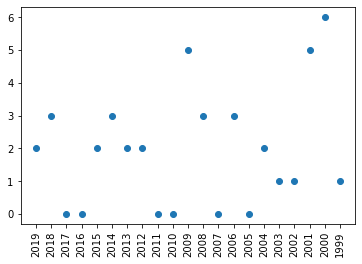

In [107]:
fig, axs = plt.subplots()
axs.scatter(years, row_data, label="afghanistan")
plt.xticks(rotation=90)

# show ledgend


In [93]:
years = names[1:-1]
years

['2019',
 '2018',
 '2017',
 '2016',
 '2015',
 '2014',
 '2013',
 '2012',
 '2011',
 '2010',
 '2009',
 '2008',
 '2007',
 '2006',
 '2005',
 '2004',
 '2003',
 '2002',
 '2001',
 '2000',
 '1999']

In [ ]:
# How can I make all the years into one column of data? or how should i go about plotting the data from this time frame
# for specific couuntries? 

In [ ]:
# china_data = requests.get("http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv") ## is it failing to write because link doesnt end in csv?
# china_data.status_code

# with open("data_china_gdp.csv", "w") as f:
#     f.write(china_data.text)

# # data = pd.read_csv("data_china_gdp.csv") ## labels the columns
# # data.head()
# data_china= pd.read_csv( "data_china_gdp.csv", index_col=None, header=0, engine='c' )


In [29]:
China_GDP_data = pd.read_csv("China_GDP.csv", sep=";") ## I don't know how to get this data to format correctly.
China_GDP_data # separating by semicolons produced the dataframe below that can't be read. I think I'm missing something. 

,"Data Source,""World Development Indicators"","
0,"Last Updated Date,""2020-10-15"","
1,"Country Name,""Country Code"",""Indicator Name"",""..."
2,"Aruba,""ABW"",""GDP (current US$)"",""NY.GDP.MKTP.C..."
3,"Afghanistan,""AFG"",""GDP (current US$)"",""NY.GDP...."
4,"Angola,""AGO"",""GDP (current US$)"",""NY.GDP.MKTP...."
...,...
261,"Kosovo,""XKX"",""GDP (current US$)"",""NY.GDP.MKTP...."
262,"Yemen, Rep.,""YEM"",""GDP (current US$)"",""NY.GDP...."
263,"South Africa,""ZAF"",""GDP (current US$)"",""NY.GDP..."
264,"Zambia,""ZMB"",""GDP (current US$)"",""NY.GDP.MKTP...."


In [10]:
def format_column_names(column_names):
    new_column_names = []
    for each in column_names:
        temp = each.split("_")
        if len(temp) == 2:
            new_column_names.append(temp[1])
        else:
            new_column_names.append(temp[0])
    return new_column_names


In [11]:
p = format_column_names(column_names)
p

['Country',
 '2019',
 '2018',
 '2017',
 '2016',
 '2015',
 '2014',
 '2013',
 '2012',
 '2011',
 '2010',
 '2009',
 '2008',
 '2007',
 '2006',
 '2005',
 '2004',
 '2003',
 '2002',
 '2001',
 '2000',
 '1999',
 'FID']